In [21]:
import pandas as pd, seaborn as sns, numpy as np, plotly.express as px
from scipy import stats

In [2]:
sns.set_palette(sns.color_palette('bright'))

In [3]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
df_mpg=mpg.groupby('drv', as_index= False)\
    .agg(mean_hwy = ('hwy','mean'))

<Axes: xlabel='drv', ylabel='mean_hwy'>

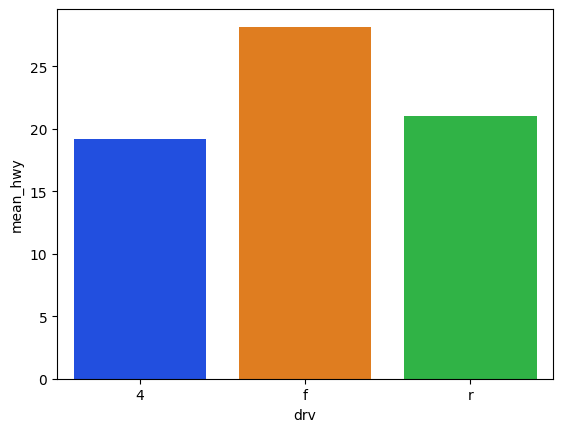

In [5]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy',hue='drv')

In [6]:
df_mpg2= mpg.query('category=="suv"')\
            .groupby('manufacturer',as_index=False)\
            .agg(cty_mean = ('cty','mean'))\
            .sort_values('cty_mean',ascending=False).head(5)
            
df_mpg2

,manufacturer,cty_mean
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='cty_mean'>

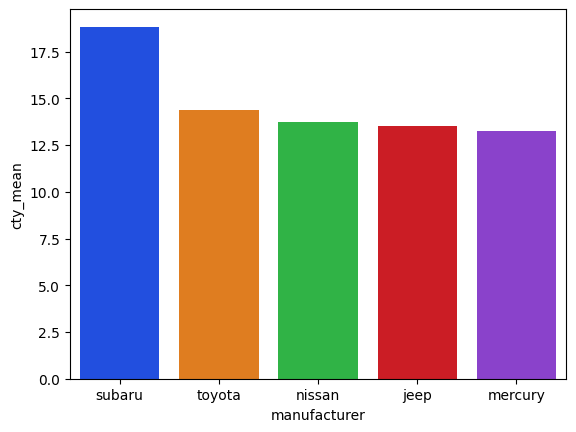

In [7]:
sns.barplot(data=df_mpg2,x='manufacturer',y='cty_mean',hue='manufacturer')

<Axes: xlabel='category', ylabel='count'>

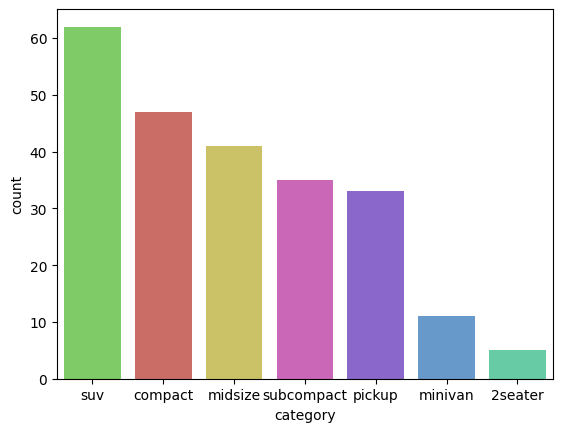

In [8]:
sns.countplot(data=mpg,x='category',hue='category',order=mpg['category'].value_counts().index,palette='hls')

<Axes: xlabel='category', ylabel='cty'>

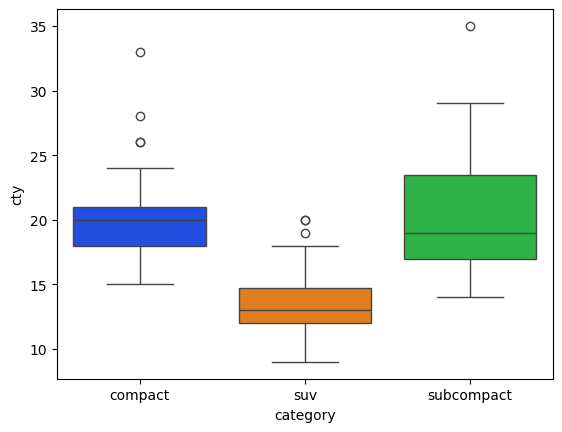

In [9]:
ct_3=mpg.query('category in["compact","subcompact","suv"]')
sns.boxplot(data=ct_3,x='category',y='cty',hue='category')

In [15]:
px.scatter(data_frame=mpg, x = 'cty',y='hwy',color='drv',width=600,height=500)

In [11]:
df=mpg.groupby('category',as_index=False)\
      .agg(n=('category','count'))

In [18]:
px.bar(data_frame=df,x='category',y='n', color='category',width=800,height=600)

In [19]:
mpg.query('category in ["compact","suv"]')\
   .groupby('category',as_index=False)\
   .agg(n= ('category','count'),mean = ('cty','mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [20]:
compact = mpg.query('category=="compact"')['cty']
suv = mpg.query('category=="suv"')['cty']

In [22]:
stats.ttest_ind(compact,suv, equal_var= True)

TtestResult(statistic=np.float64(11.917282584324107), pvalue=np.float64(2.3909550904711282e-21), df=np.float64(107.0))